# Modelo para la Ciudad de Bogotá

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##Sección de código para ejecutar el ejercicio en COLAB sin realizar ningún cambio adicional.
#from google.colab import drive
#drive.mount('/content/drive')
#baseUrl = '/content/drive/Shared drives/Analitica Predictiva/covid-19-flr-analitica-predictiva'
#os.chdir(baseUrl)

Librerias requeridas para realizar los modelos.

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Modelo Corto Plazo

In [6]:
ciudades = ['Bogotá D.C.','Medellín','Cali','Barranquilla', 'Cartagena de Indias']
names = ['Bogota','Medellin','Cali','Barranquilla','Cartagena']
id_city = 0
name = names[id_city]
urlDataSet = 'Datos/data_{}.pickle'.format(name)
datename = 'fecha_infeccioso'

Se carga el dataset generado en la sección de preprocesamiento, se muestran los últimos 20 registros, para validar visualmente los ultimos días de información.

In [7]:
df_city = pd.read_pickle(urlDataSet)
df = df_city.copy()
df.tail(20)

,dias,semana,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
fecha_infeccioso,,,,,,,,,
2020-08-16,171,24,1194.0,4541.0,83.0,137715.0,91713.0,4824.0,41178.0
2020-08-17,172,24,1264.0,4896.0,75.0,138979.0,96609.0,4899.0,37471.0
2020-08-18,173,24,1555.0,4542.0,101.0,140534.0,101151.0,5000.0,34383.0
2020-08-19,174,24,1861.0,4788.0,89.0,142395.0,105939.0,5089.0,31367.0
2020-08-20,175,25,1885.0,2919.0,79.0,144280.0,108858.0,5168.0,30254.0
2020-08-21,176,25,1281.0,2571.0,80.0,145561.0,111429.0,5248.0,28884.0
2020-08-22,177,25,877.0,3290.0,81.0,146438.0,114719.0,5329.0,26390.0
2020-08-23,178,25,753.0,6763.0,61.0,147191.0,121482.0,5390.0,20319.0
2020-08-24,179,25,849.0,3560.0,71.0,148040.0,125042.0,5461.0,17537.0


## Análisis
Mostramos los casos activos


<AxesSubplot:xlabel='fecha_infeccioso'>

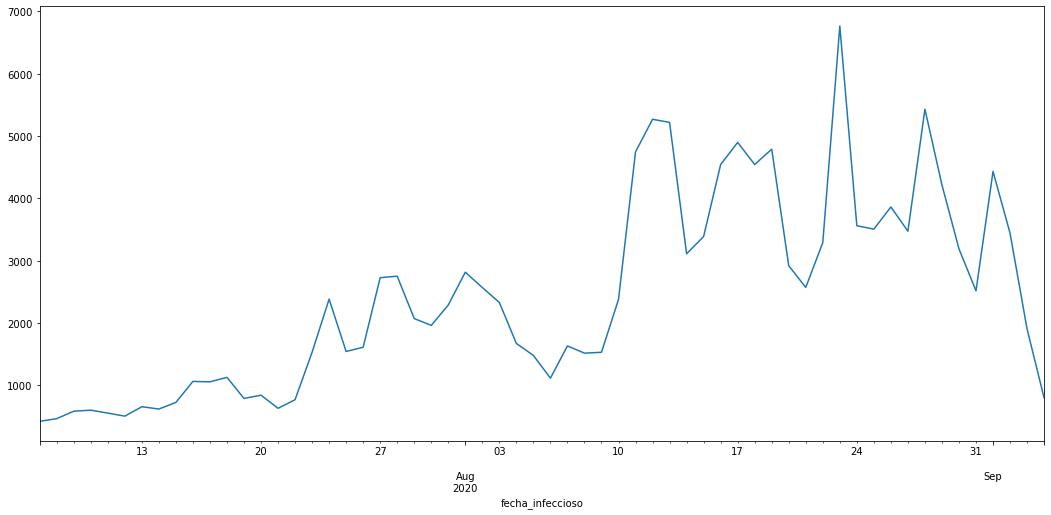

In [7]:
f = plt.figure(figsize=(18,8))
df_city['recuperados'][-60:].plot()

In [8]:
df_city.shape[0]
x_df = df_city[['infectados','recuperados','muertos', 'dias']]

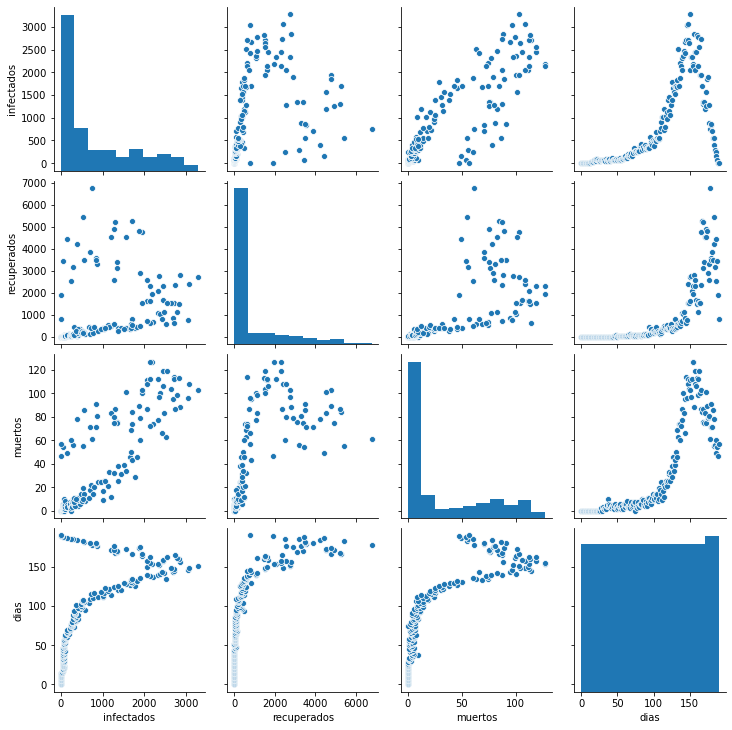

In [9]:
import seaborn as sns

sns.pairplot(x_df)

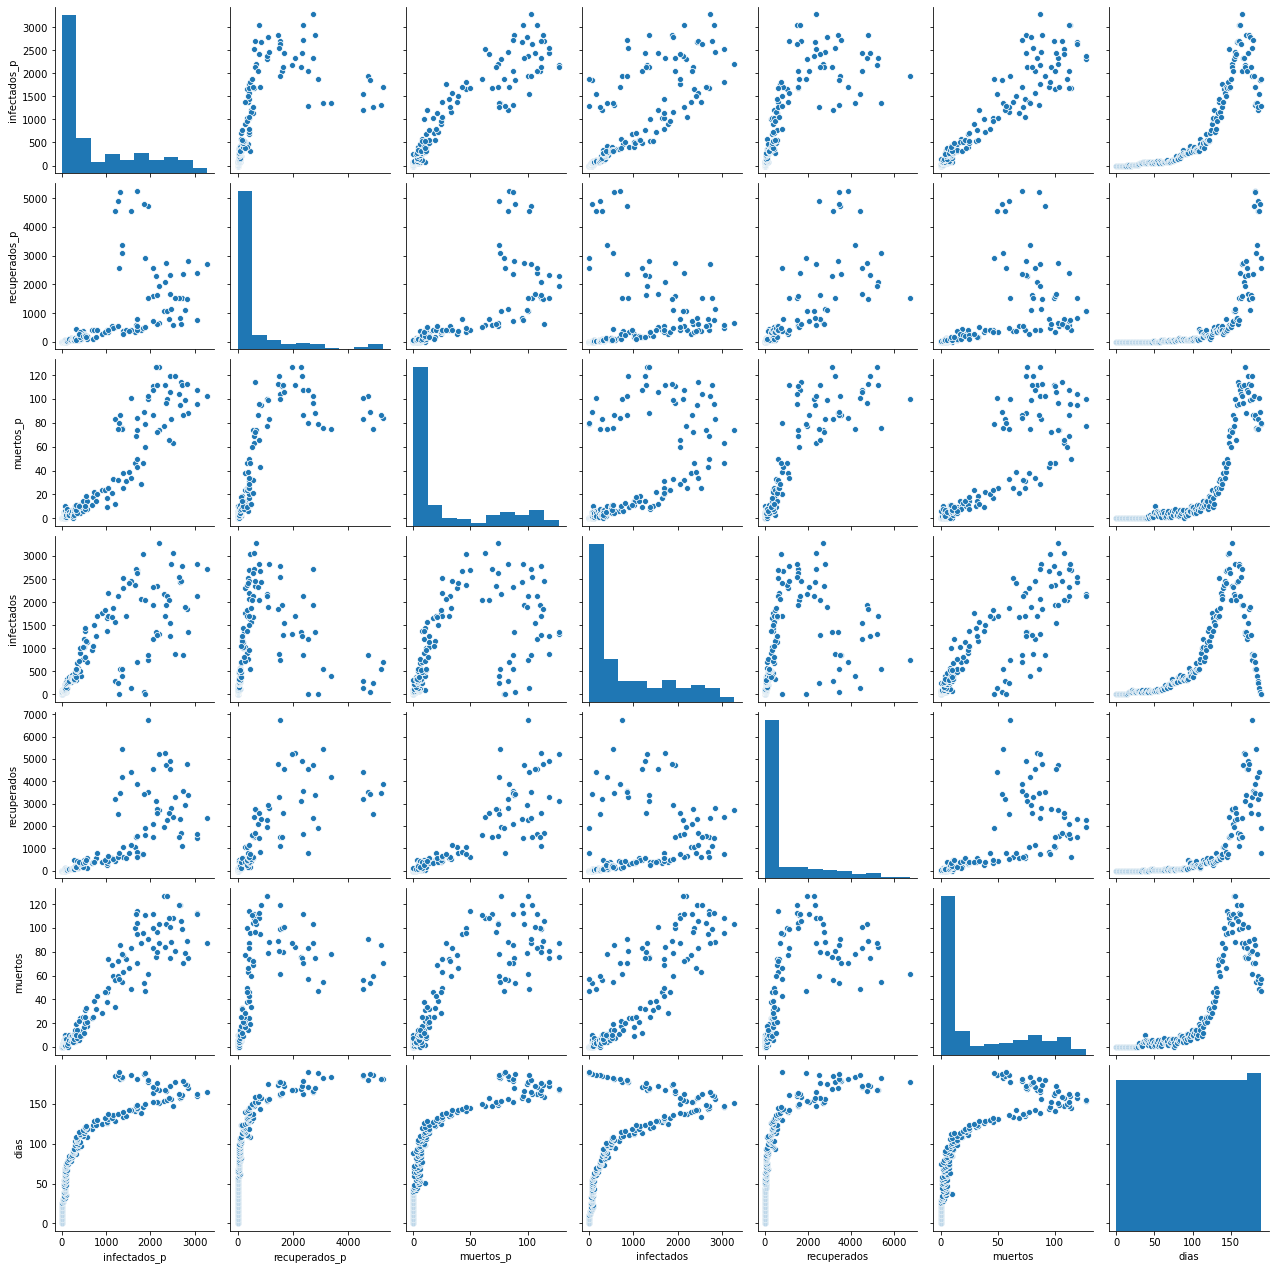

In [9]:
pasado = pd.DataFrame()
pasado[['infectados_p','recuperados_p','muertos_p']] = x_df[['infectados','recuperados','muertos']].shift(14,fill_value=0)
values = pd.concat([pasado,x_df],axis = 1)
sns.pairplot(values)

In [3]:
#Nuestro modelo se basa en el conocimiento del pasado la entrada de datos equivale a todas los datos 2 semanas antes.
pasado = x_df[['infectados']].shift(14,fill_value=0)
x_df = pd.concat([pasado,x_df['dias']],axis=1)
x_df

NameError: name 'x_df' is not defined

# Separación de de datos
Separamos los datos usando train test split

In [2]:
dias_val= 14
dias_restantes = df_city.shape[0]-dias_val
test_size = 0.25

dias_fit = math.floor(dias_restantes*(1-test_size))
dias_test = math.floor(dias_restantes*test_size)


x_reshape = x_df.values[:].reshape(-1,len(x_df.columns))

#Preparación
Y = df_city['infectados'].values[:].reshape(-1,1)
X = x_df

#Los datos de validación son los datos de los últimos  días.
X_val = X[-dias_val:]
Y_val = Y[-dias_val:]
X_fit_test = X[:-dias_val]
Y_fit_test = Y[:-dias_val]

#X_test = X[dias_fit:(dias_fit+dias_test)]

#Y_val = Y[-dias_val:]
#Y_fit = Y[:dias_fit]
#Y_test =Y[dias_fit:(dias_fit+dias_test)]

NameError: name 'df_city' is not defined

In [163]:
Y_fit

array([[3.430e+02],
       [3.277e+03],
       [3.270e+02],
       [6.100e+01],
       [8.990e+02],
       [1.129e+03],
       [7.500e+01],
       [2.699e+03],
       [8.600e+01],
       [3.400e+01],
       [5.000e+00],
       [9.200e+01],
       [1.650e+03],
       [0.000e+00],
       [1.000e+00],
       [2.332e+03],
       [3.110e+02],
       [6.800e+01],
       [6.000e+01],
       [2.416e+03],
       [1.130e+02],
       [1.194e+03],
       [7.300e+02],
       [1.020e+02],
       [1.150e+03],
       [1.380e+03],
       [1.821e+03],
       [2.838e+03],
       [1.520e+02],
       [1.270e+03],
       [1.884e+03],
       [0.000e+00],
       [2.190e+02],
       [4.800e+01],
       [5.140e+02],
       [2.461e+03],
       [5.230e+02],
       [1.230e+02],
       [1.682e+03],
       [2.160e+02],
       [7.900e+01],
       [9.600e+01],
       [1.692e+03],
       [1.281e+03],
       [1.555e+03],
       [2.053e+03],
       [1.017e+03],
       [5.590e+02],
       [3.260e+02],
       [1.051e+03],


In [1]:
f = plt.figure(figsize=(18,8))
plt.plot(X_fit_test['dias'],Y_fit_test,label='Entrenamiento-Testing')
plt.plot(X_val['dias'],Y_val,label='Validacion')
plt.legend()

NameError: name 'plt' is not defined

In [164]:
X_fit_test_r = X_fit_test.values[:].reshape(-1,len(X_fit_test.columns))
X_reshape_val = X_val.values[:].reshape(-1,len(X_val.columns))
from sklearn.model_selection import train_test_split
X_fit,X_test,Y_fit,Y_test = train_test_split(X_fit_test_r,Y_fit_test,shuffle=True,test_size=30)

In [166]:
x_plot_fit = [x[1] for x in X_fit]
x_plot_test = [x[1] for x in X_test]
x_plot_val = [x[1] for x in X_val.values[:]]
x_plot_fit_test = [x[1] for x in X_fit_test.values[:]]

In [167]:
x_plot_val

[177.0,
 178.0,
 179.0,
 180.0,
 181.0,
 182.0,
 183.0,
 184.0,
 185.0,
 186.0,
 187.0,
 188.0,
 189.0,
 190.0]

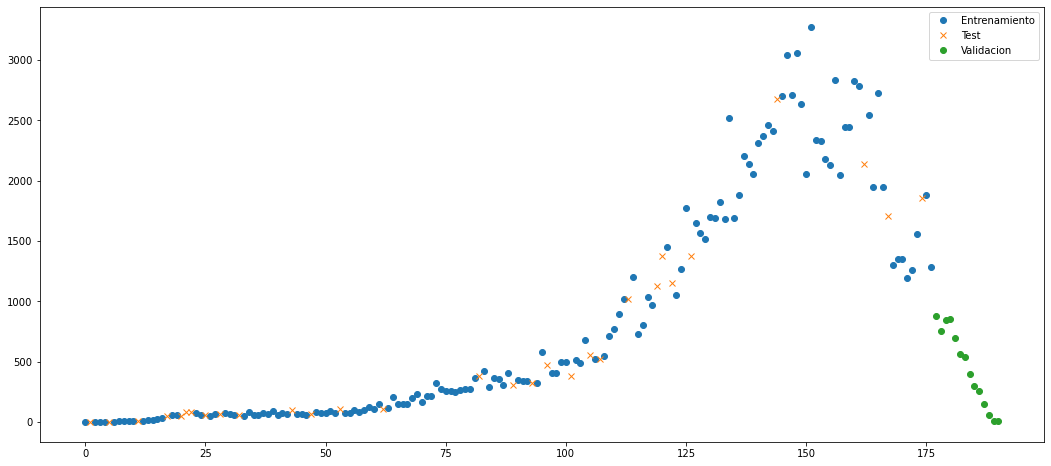

In [168]:
plt.figure(figsize=(18,8))
plt.plot(x_plot_fit,Y_fit,'o',label='Entrenamiento',)
plt.plot(x_plot_test,Y_test,'x',label='Test')
plt.plot(x_plot_val,Y_val,'o',label='Validacion')
plt.legend()

In [178]:
#Regresion Lineal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

regressor = Ridge(alpha=30)

pipe =Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('power',PowerTransformer(method='box-cox')),
        ('regressor',regressor)
        ])
pipe.fit(X_fit,Y_fit)
y_fit_pred = pipe.predict(X_fit)
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)
f = plt.figure(figsize=(18,8))
plt.plot(x_plot_fit,Y_fit,'or')
plt.plot(x_plot_test,Y_test,'ob')
plt.plot(x_plot_val,Y_val,'og')

print("MSE_fit",mean_squared_error(Y_fit,y_fit_pred))
print("MSE_test",mean_squared_error(Y_test,y_test_pred))

y_fit_test_pred = pipe.predict(X_fit_test_r)
y_val_pred = pipe.predict(X_val)

print("MSE_Val",mean_squared_error(Y_val,y_val_pred))

plt.plot(x_plot_fit_test,y_fit_test_pred)
plt.plot(x_plot_val,y_val_pred)
#plt.plot(X_test['dias'],y_test_pred,'-r')
#plt.plot(X_val['dias'],y_val_pred,'-b')
#plt.plot(X_val['dias'],y_val_pred,'or')

ValueError: The Box-Cox transformation can only be applied to strictly positive data

MSE_fit 21980.911066493733
MSE_test 4896472.182905609


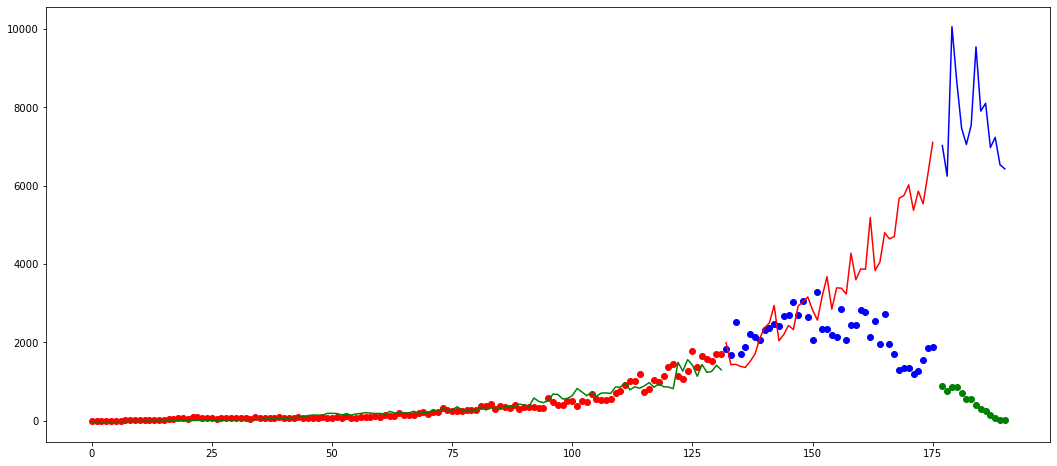

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=10)
pipe =Pipeline(steps=[('scaler',StandardScaler()),('regressor',regressor)])
pipe.fit(X_fit,Y_fit)
y_fit_pred = pipe.predict(X_fit)
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)


from sklearn.metrics import mean_squared_error

print("MSE_fit",mean_squared_error(Y_fit,y_fit_pred))
print("MSE_test",mean_squared_error(Y_test,y_test_pred))

f = plt.figure(figsize=(18,8))
plt.plot(X_fit['dias'],Y_fit,'or')
plt.plot(X_test['dias'],Y_test,'ob')
plt.plot(X_val['dias'],Y_val,'og')

plt.plot(X_fit['dias'],y_fit_pred,'-g')
plt.plot(X_test['dias'],y_test_pred,'-r')
plt.plot(X_val['dias'],y_val_pred,'-b')
#plt.plot(X_val['dias'],y_val_pred,'or')

In [ ]:
#Hallamos la tendencia a traves de una arp

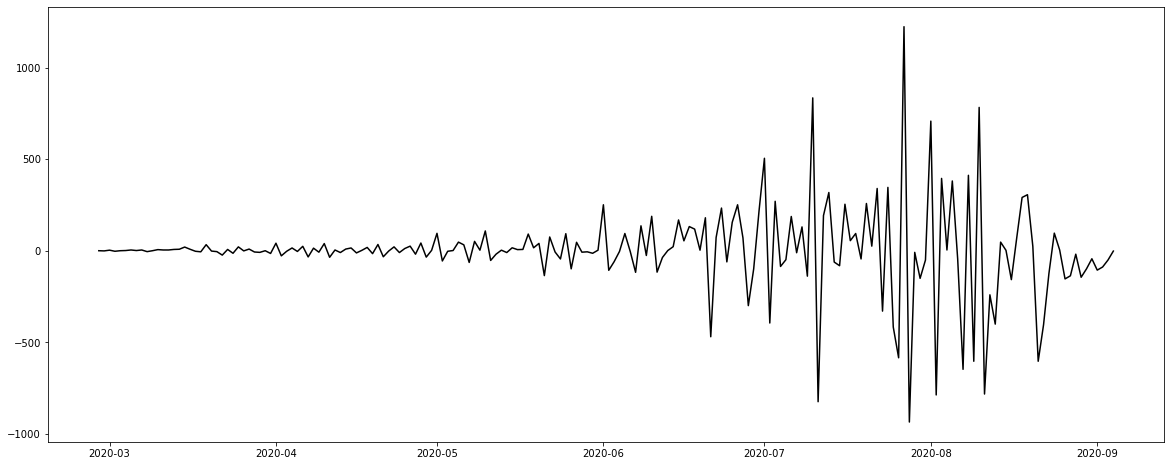

In [20]:
#Eliminacion de la tendencia
infectados_serie = df_city['infectados'].copy()
infectados_diff = infectados_serie - infectados_serie.shift(1) 
f = plt.figure(figsize=(20,8))
l15 = infectados_diff
plt.plot(l15,'-k')

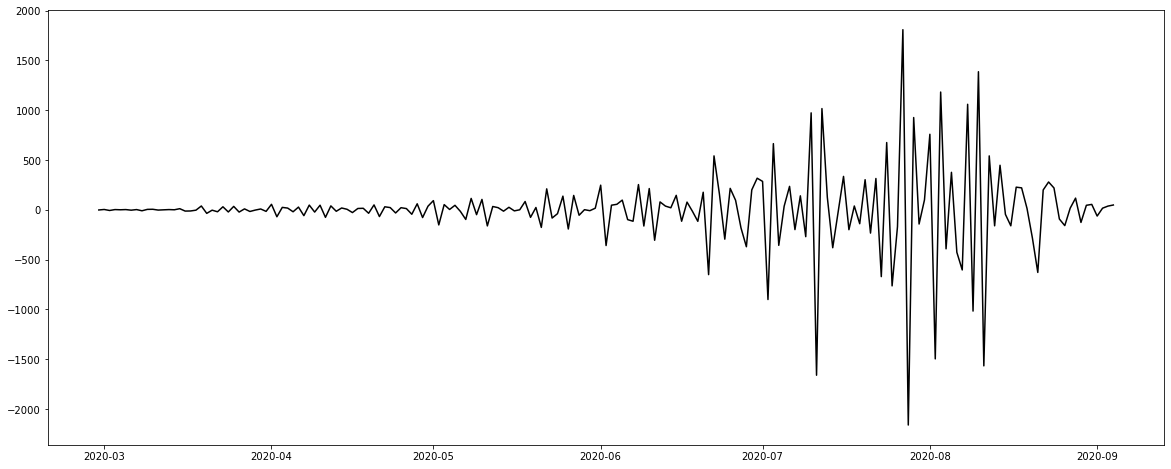

In [21]:
f = plt.figure(figsize=(20,8))
infectados_diff2 = infectados_diff - infectados_diff.shift(1) 
plt.plot(infectados_diff2,'-k')

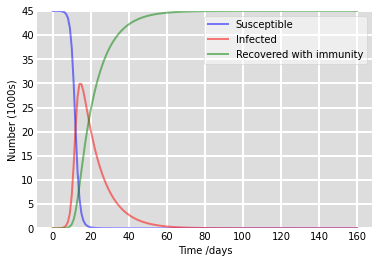

In [14]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 45000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,45)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [292]:
#Test Keras
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2 
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise 
    return series[..., np.newaxis].astype(np.float32)

In [293]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1] 
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
from tensorflow import keras
y_pred = X_valid[:,-1]

In [ ]:
series.shape

In [290]:
!pip3 install tensorflow

In [291]:
from tensorflow import keras